In [1]:
%cd ..

/home/eli/AnacondaProjects/ppc_experiments


In [2]:
import argparse
import collections
import lightning
import numpy as np
import pyro
import torch
import logger, train

Seed set to 123


In [3]:
# pyro.enable_validation(True)
# torch.autograd.set_detect_anomaly(True)

In [4]:
config, (data, model, trainer) = train.from_file("experiments/ppc_minibmnist_config.json")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [5]:
trainer.fit(model, data, ckpt_path="saved/models/MiniBouncingMnist_Ppc/0515_123301/checkpoint_999.ckpt")

Missing logger folder: saved/log/MiniBouncingMnist_Ppc/0515_141625/lightning_logs
/home/eli/miniforge3/envs/ppc/lib/python3.11/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:653: Checkpoint directory /home/eli/AnacondaProjects/ppc_experiments/saved/models/MiniBouncingMnist_Ppc/0515_141625 exists and is not empty.
Restoring states from the checkpoint path at saved/models/MiniBouncingMnist_Ppc/0515_123301/checkpoint_999.ckpt
/home/eli/miniforge3/envs/ppc/lib/python3.11/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:361: The dirpath has changed from '/home/eli/AnacondaProjects/ppc_experiments/saved/models/MiniBouncingMnist_Ppc/0515_123301' to '/home/eli/AnacondaProjects/ppc_experiments/saved/models/MiniBouncingMnist_Ppc/0515_141625', therefore `best_model_score`, `kth_best_model_path`, `kth_value`, `last_model_path` and `best_k_models` won't be reloaded. Only `best_model_path` will be reloaded.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type 

Sanity Checking: |                                                                                            …

`Trainer.fit` stopped: `max_epochs=1000` reached.


In [6]:
model.graph.clear()
model.eval()
model.cpu()
model.particles['valid'].cpu()

ParticleDict(
    (z_what): Parameter containing: [torch.FloatTensor of size 10x100x3x10]
    (z_where__0): Parameter containing: [torch.FloatTensor of size 10x100x3x2]
    (z_where__1): Parameter containing: [torch.FloatTensor of size 10x100x3x2]
    (z_where__2): Parameter containing: [torch.FloatTensor of size 10x100x3x2]
    (z_where__3): Parameter containing: [torch.FloatTensor of size 10x100x3x2]
    (z_where__4): Parameter containing: [torch.FloatTensor of size 10x100x3x2]
    (z_where__5): Parameter containing: [torch.FloatTensor of size 10x100x3x2]
    (z_where__6): Parameter containing: [torch.FloatTensor of size 10x100x3x2]
    (z_where__7): Parameter containing: [torch.FloatTensor of size 10x100x3x2]
    (z_where__8): Parameter containing: [torch.FloatTensor of size 10x100x3x2]
    (z_where__9): Parameter containing: [torch.FloatTensor of size 10x100x3x2]
)

In [7]:
num_valid_data = len(data.val_dataloader().dataset) % data.val_dataloader().batch_size

In [8]:
model._load_particles(torch.tensor(list(range(num_valid_data))), False)

In [9]:
import matplotlib.pyplot as plt

In [10]:
xs, target, index = list(data.val_dataloader())[0]

In [11]:
xs.shape

torch.Size([100, 10, 96, 96])

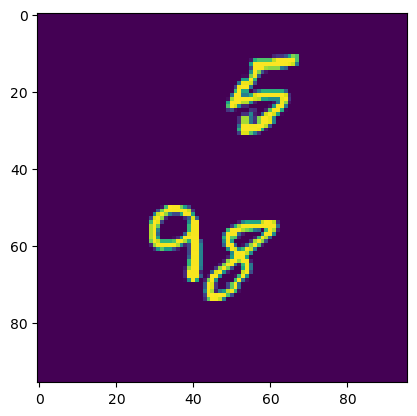

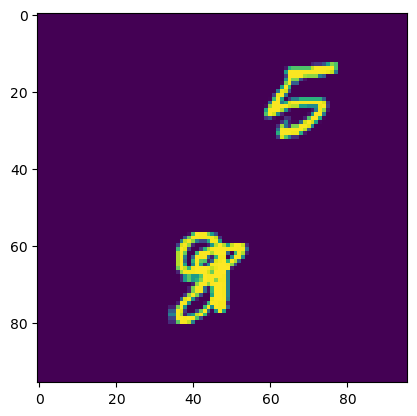

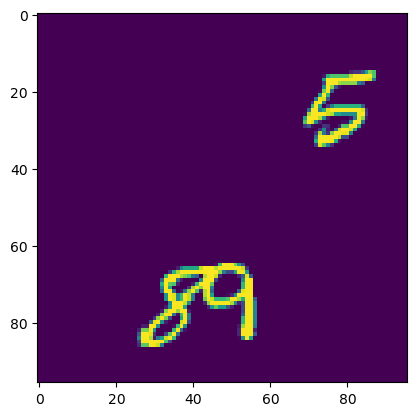

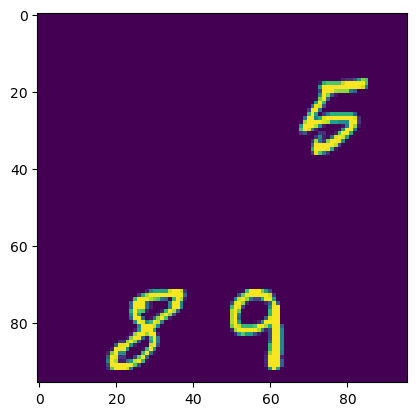

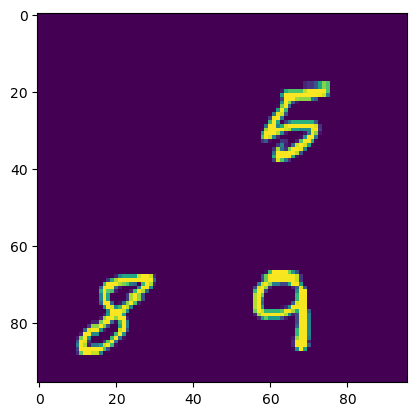

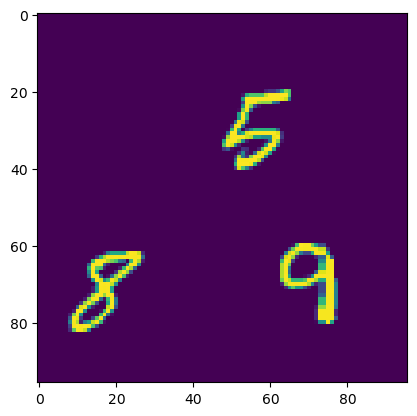

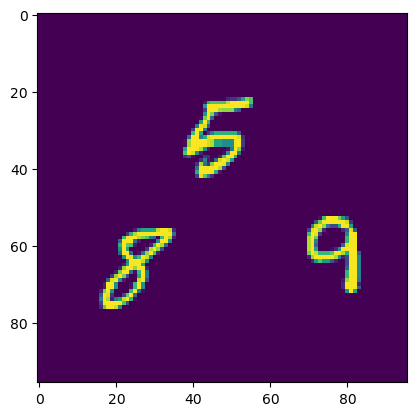

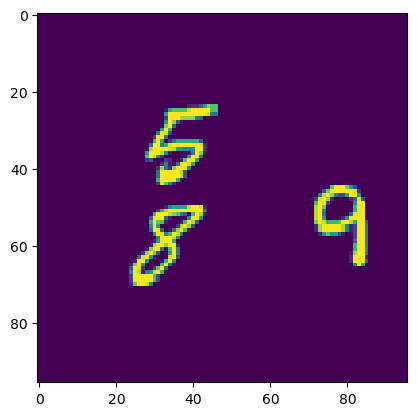

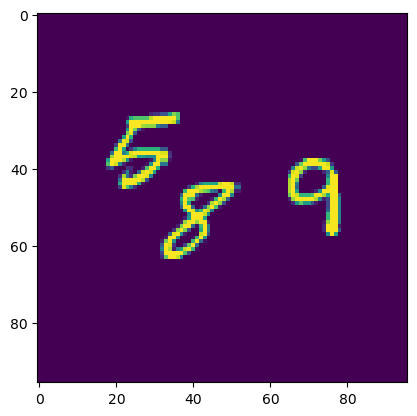

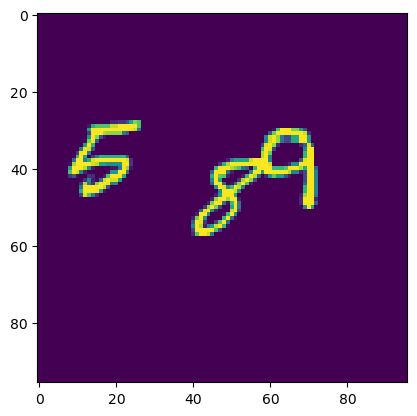

In [12]:
for t in range(xs.shape[1]):
    plt.imshow(xs[0, t, :, :])
    plt.show()

In [13]:
for site in model.graph.nodes:
    model.graph.nodes[site]['is_observed'] = site in model.particles['valid']

In [14]:
predictive = pyro.condition(model.graph, data={k: v['value'] for k, v in model.graph.nodes.items()})
estimates = predictive(xs=xs, P=model.num_particles, prior=True)

In [15]:
estimates = torch.stack(estimates, dim=-3)

In [16]:
estimate = estimates.mean(dim=0)[0]

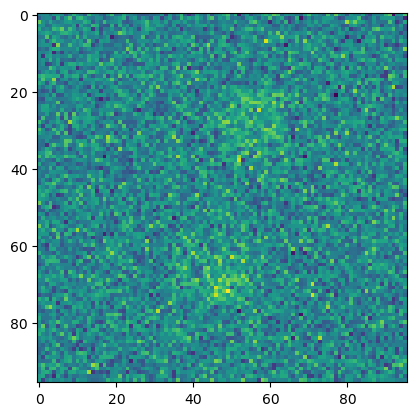

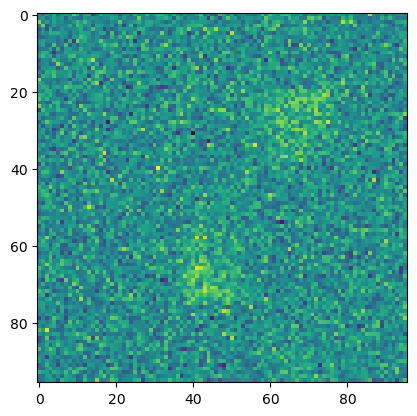

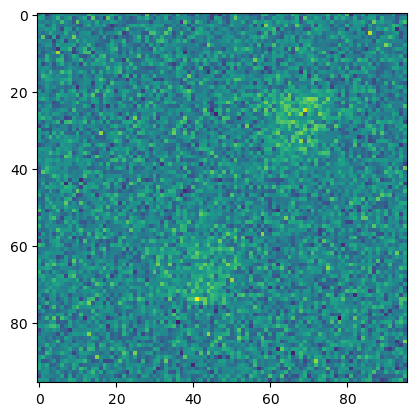

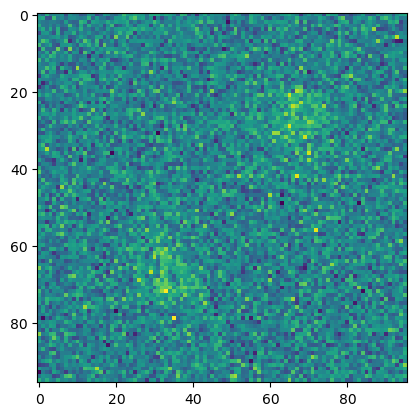

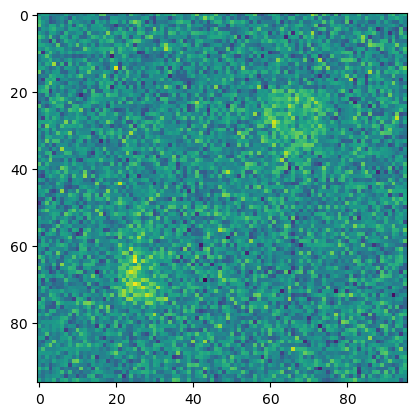

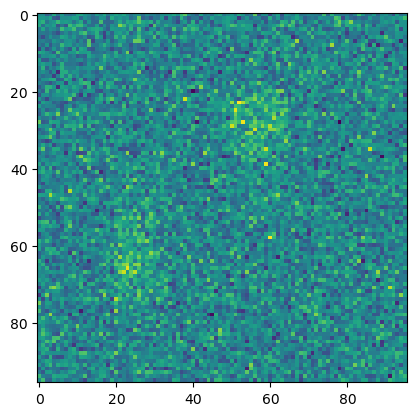

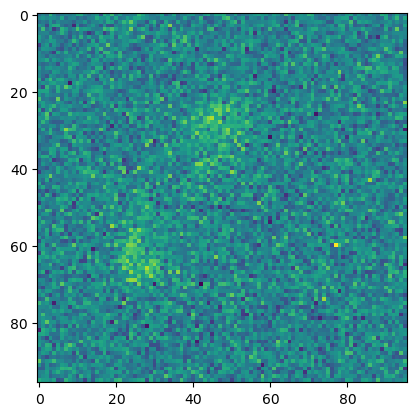

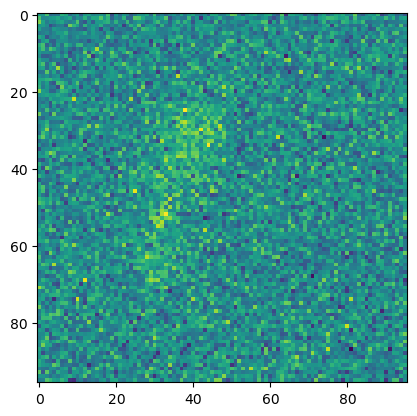

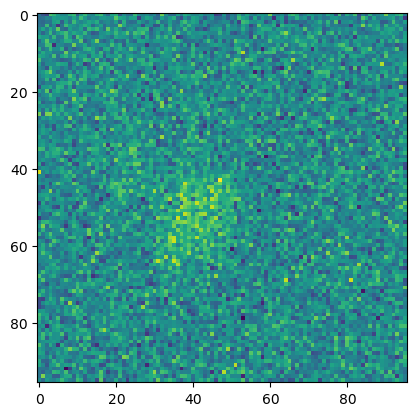

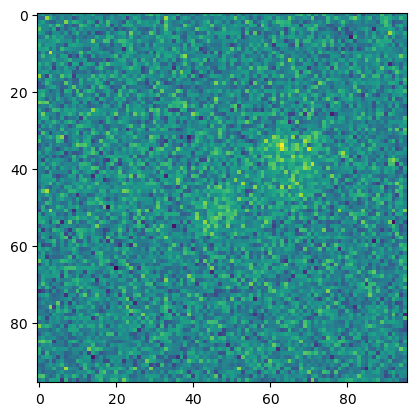

In [17]:
for t in range(estimate.shape[0]):
    plt.imshow(estimate[t, :, :].detach().numpy())
    plt.show()